# SETUP

In [7]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2 # type: ignore
from cv2 import imread, imshow, waitKey
import matplotlib.pyplot as plt 
import numpy as np

# FUNCTION TO DISPLAY IMAGE (FOR EASY USE)

In [12]:
def display_image_rgb(image, title="Image to display", size=5):
    """
    Display an image using Matplotlib after converting it from BGR to RGB.
    
    Args:
    image: Image object (numpy array) loaded via OpenCV.
    title (str): Title for the image display.
    size (int): Base size for the display.
    
    Returns:
    None
    """
    # Ensure the input is an image (numpy array)
    if isinstance(image, str):
        img = cv2.imread(image)
    else:
        img = image

    width, height = img.shape[0], img.shape[1]
    aspect_ratio = width / height
    plt.figure(figsize=(size * aspect_ratio, size))
    
    # Convert the image to RGB and display it
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    # plt.axis('off')  # Hide the axis for cleaner presentation
    plt.show()

def display_image_bgr(image, title="Image to display", size=5):
    """
    Display an image in BGR format using Matplotlib (without converting it to RGB).
    
    Args:
    image: Image object (numpy array) loaded via OpenCV.
    title (str): Title for the image display.
    size (int): Base size for the display.
    
    Returns:
    None
    """
    # Ensure the input is an image (numpy array)
    img = cv2.imread(image)

    # Get dimensions and aspect ratio
    width, height = img.shape[0], img.shape[1]
    aspect_ratio = width / height
    plt.figure(figsize=(size * aspect_ratio, size))
    
    # Display the image in BGR (as OpenCV loads it)
    plt.imshow(img)
    plt.title(title)
    # plt.axis('off')  # Hide the axis for cleaner presentation
    plt.show()

# EXAMPLE OF DISPLAYING IMAGE

Datatype: uint8 
Dimensions: (215, 234, 3)
[255 255 255]
Pixel value at (100, 150): [ 67 189 235]
Pixel value at (210, 230): [255 255 255]


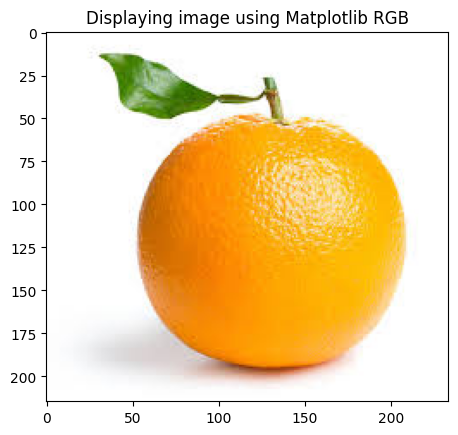

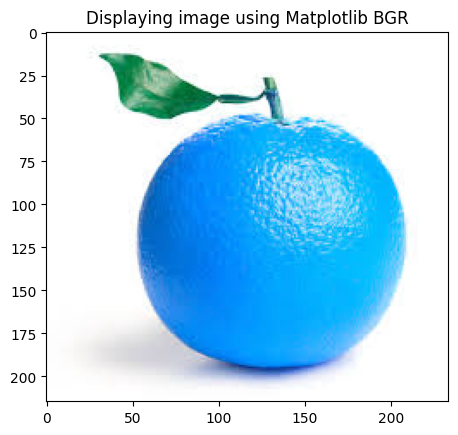

2024-09-25 10:47:47.081 Python[55047:4988412] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


In [18]:
# Define the path to your image
imagepath = 'Kelas2/orange.jpg'

# Load the image using OpenCV
img = cv2.imread(imagepath) #By default cv2 akan convert image ke BGR

# Kalo mau pake plt harus convert ke RGB
# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Print datatype and dimensions
print('Datatype:', img.dtype, '\nDimensions:', img.shape) 
#analog to digital => mengubah gmbr ke rows columns dan channel
    # row = 215
    # column = 234
    # channel = 3 (rgb)

print(img[0, 0]) 
print('Pixel value at (100, 150):', img[100, 150])
print('Pixel value at (210, 230):', img[210, 230])

# Display the image using Matplotlib converted to rgb from bgr
plt.imshow(img_rgb)
plt.title('Displaying image using Matplotlib RGB')
plt.show()

# Display the image using Matplotlib
plt.imshow(img)
plt.title('Displaying image using Matplotlib BGR')
plt.show()

# Display the image using OpenCV
cv2.imshow('Displaying image using OpenCV', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Display the image using function
# display_image_rgb(img, "Displaying Image in RGB")
# display_image_bgr(imagepath, "Displaying Image in BGR")

# NEGATED IMAGE

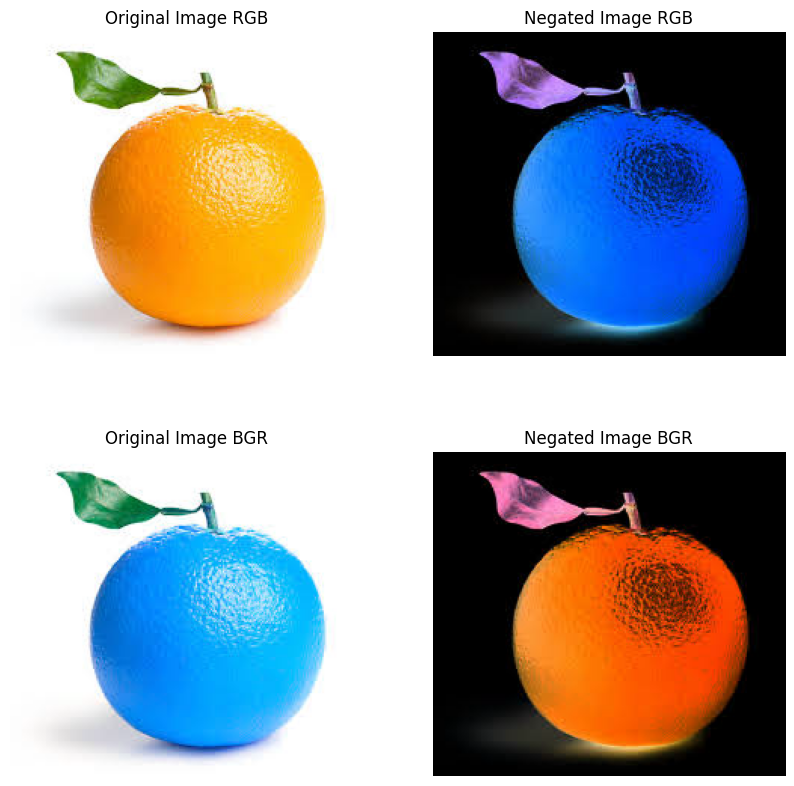

In [50]:
def negate_image(image):
    # Negates the given image.
    # Args:
    # image: The input image as a NumPy array.
    # Returns:
    # The negated image as a NumPy array.
    # Calculate the negated image
    negated_image = 255 - image
    return negated_image

# Load an image (DEFAULT BGR)
image_bgr = cv2.imread('Kelas2/orange.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Negate the image
negated_image_bgr = negate_image(image_bgr)

# Convert the negated image from BGR to RGB
negated_image_rgb = cv2.cvtColor(negated_image_bgr, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(10, 10))

# Plot original image RGB
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image RGB')
plt.axis('off')

# Plot negated image RGB
plt.subplot(2, 2, 2)
plt.imshow(negated_image_rgb)
plt.title('Negated Image RGB')
plt.axis('off')

# Plot original image BGR
plt.subplot(2, 2, 3)
plt.imshow(image_bgr) 
plt.title('Original Image BGR')
plt.axis('off')

# Plot negated image BGR
plt.subplot(2, 2, 4)
plt.imshow(negated_image_bgr) 
plt.title('Negated Image BGR')
plt.axis('off')

plt.show()

# THRESHOLD IMAGE

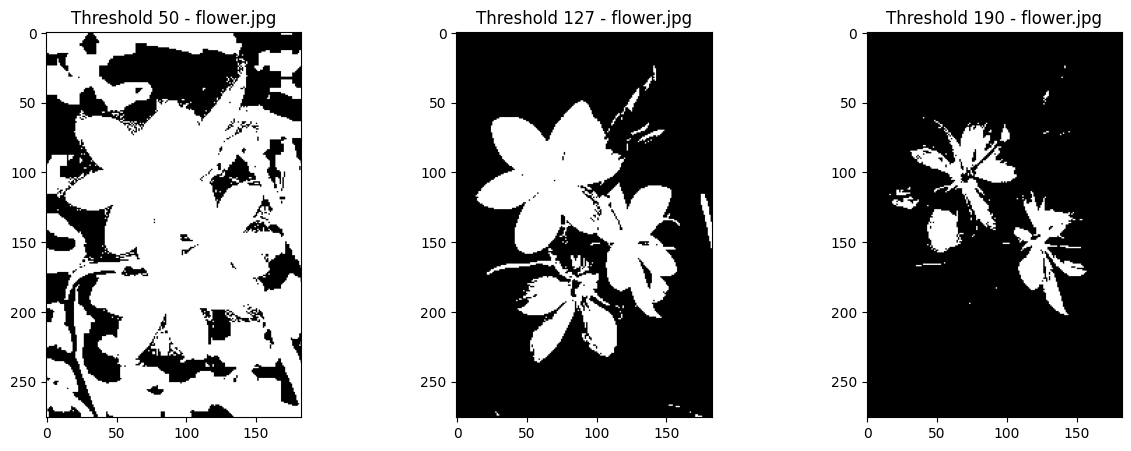

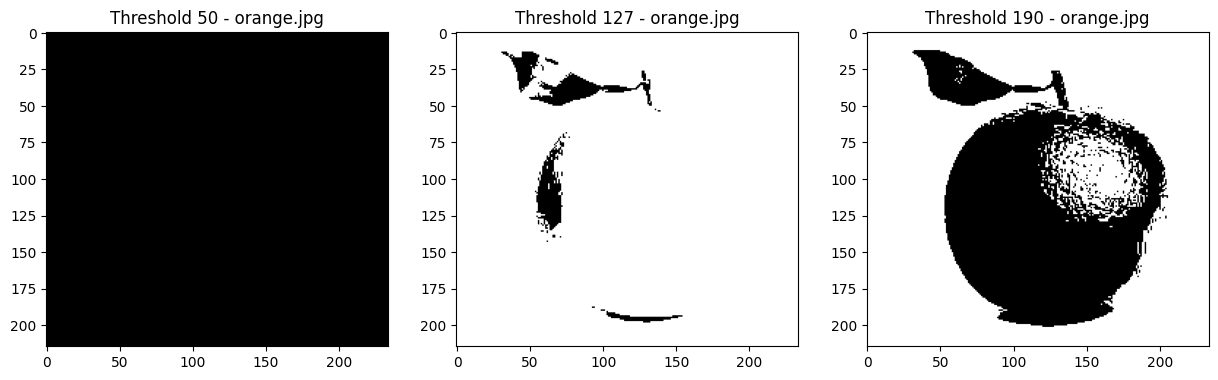

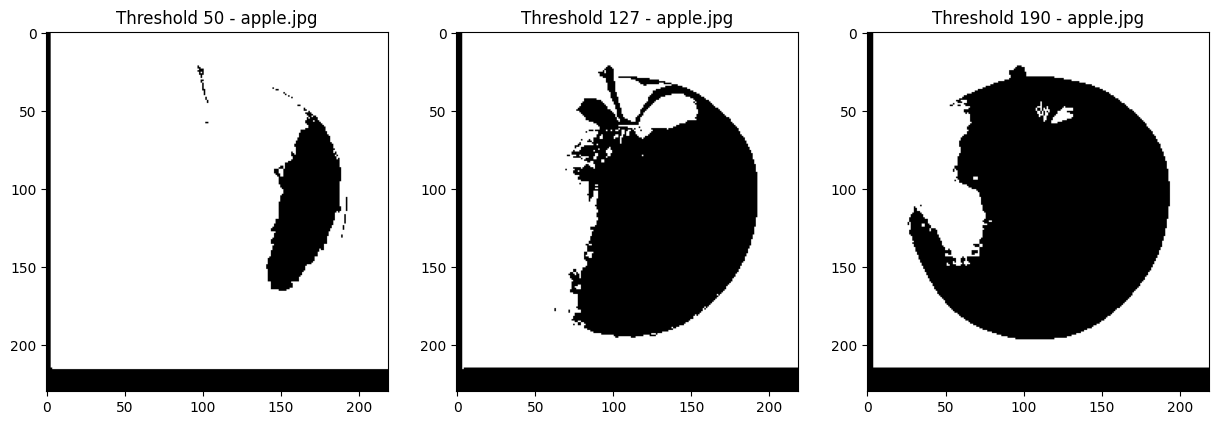

In [52]:
def display_images_threshold(images, titles):
    """
    Display multiple images side by side using Matplotlib.
    
    Args:
    images (list): List of images to display.
    titles (list): List of titles for each image.
    
    Returns:
    None
    """
    n = len(images) 
    plt.figure(figsize=(15, 5)) 

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
    
    # Display all images
    plt.show()

def apply_thresholding(image_path):
    # Read the image    
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error: Unable to load image {image_path}")
        return

    # Convert the image to grayscale (necessary for thresholding)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, binary_50 = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)
    ret, binary_127 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    ret, binary_190 = cv2.threshold(img_gray, 190, 255, cv2.THRESH_BINARY)
    # Apply different thresholding methods (50,127,190, sembarang)
        # Threshold Value: The value you specify (e.g., 50, 127, 190) is the cutoff.
        # Pixel Values Below Threshold: These pixels will be set to 0 (black).
        # Pixel Values Above Threshold: These pixels will be set to the maximum value (e.g., 255 for white).
        
    # All pixel values greater than the thresholdValue will be set to 255 (white), and those less than or equal to thresholdValue will be set to 0 (black).

    images = [binary_50, binary_127, binary_190]
    titles = [f'Threshold 50 - {image_path}', f'Threshold 127 - {image_path}', f'Threshold 190 - {image_path}']

    # Display the images
    display_images_threshold(images, titles)


# ADD THE IMAGE PATHS HERE
image_paths = ["Kelas2/flower.jpg", "Kelas2/orange.jpg", "Kelas2/apple.jpg"] 

# Usage
for image_path in image_paths:
    apply_thresholding(image_path)

# HISTOGRAM


## BASIC

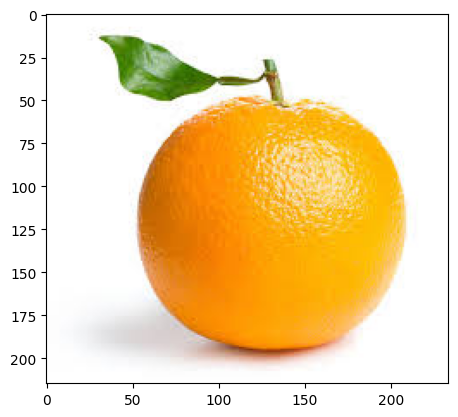

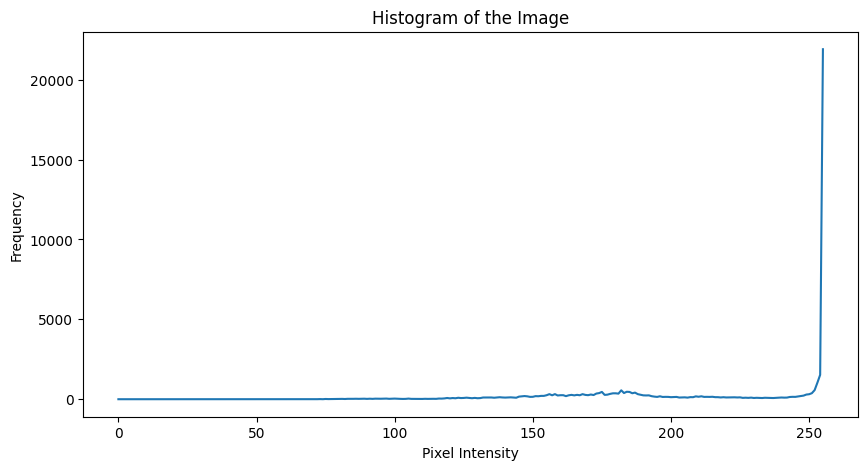

In [14]:
# Load the image
imagepath= 'Kelas2/orange.jpg'

image = cv2.imread(imagepath)
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate the histogram
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.imshow(rgb_image)

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(histogram)
plt.xlabel('Pixel Intensity')
# 0 -> GELAP
# 255 -> TERANG

plt.ylabel('Frequency')
# Seringnya muncul nya nilai pixel

plt.title('Histogram of the Image')
plt.show()

## STRETCHED HISTOGRAM

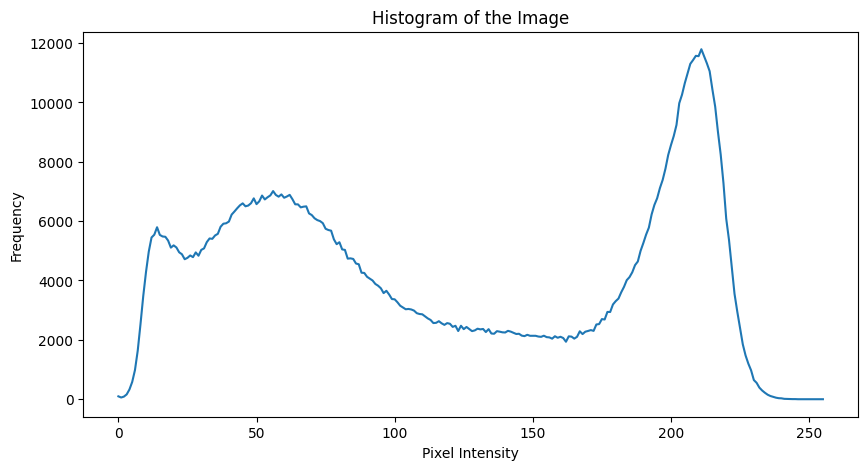

Min Value: 0, Max Value: 251


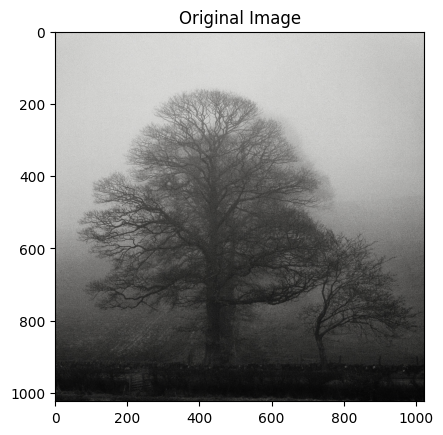

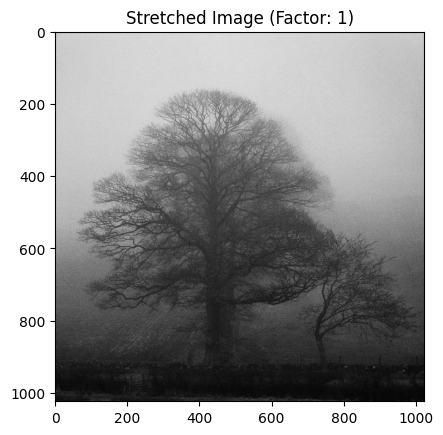

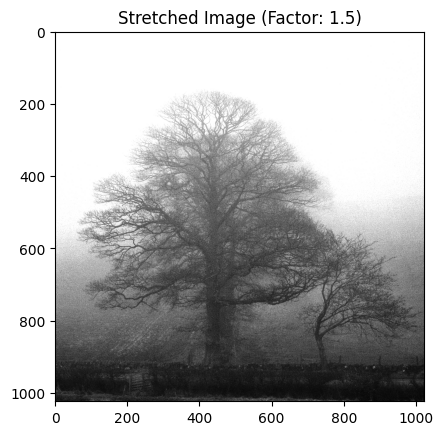

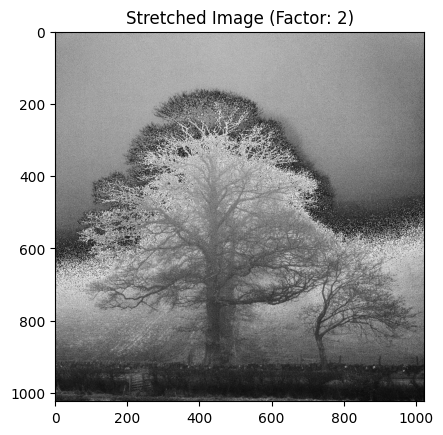

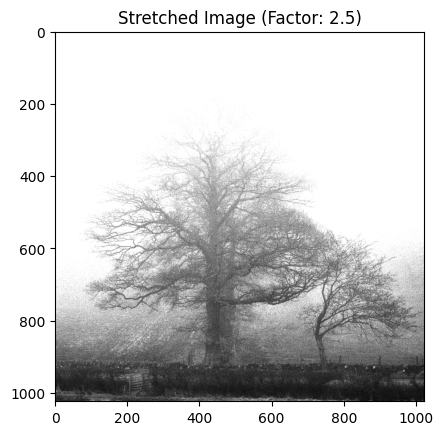

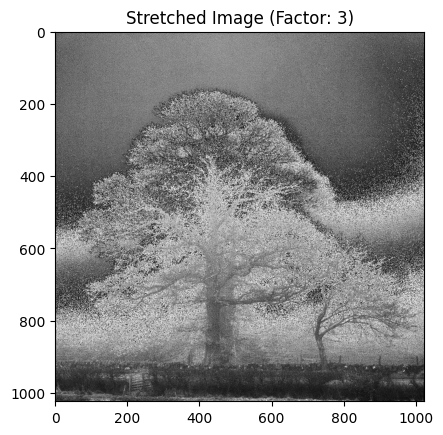

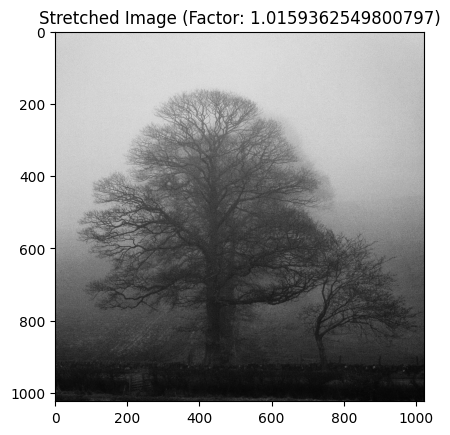

In [15]:
# Load the image
imagepath = 'Kelas3/contrast2.jpg'
image = cv2.imread(imagepath)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(histogram)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of the Image')
plt.show()

# Calculate the min and max pixel values
min_val = np.min(image)
max_val = np.max(image)
calc_stretched_factor = 255/(max_val-min_val)
print(f"Min Value: {min_val}, Max Value: {max_val}")

# Define the stretching factors
stretch_factors = [1, 1.5, 2, 2.5, 3, calc_stretched_factor]

# Create a list to store stretched images
stretched_images = []

# Stretch the histogram for each factor
for factor in stretch_factors:
    # Stretch the histogram

    stretched_image = np.uint8(np.clip((gray_image - min_val) * factor, 0, 255))
    stretched_images.append(stretched_image)

# Display the original and stretched images
def display_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Display original image
display_image(image, "Original Image")

# Display stretched images
for i, stretched_image in enumerate(stretched_images):
    display_image(stretched_image, f"Stretched Image (Factor: {stretch_factors[i]})")

# SMOOHTED IMAGE

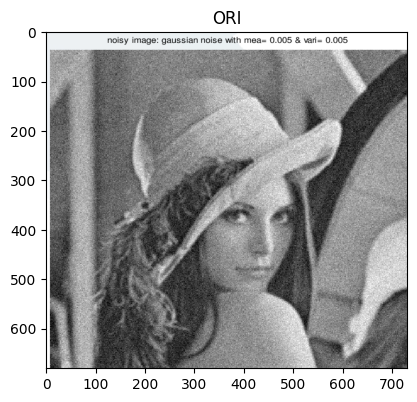

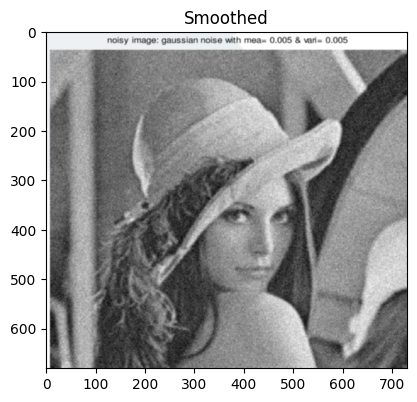

In [29]:
img = cv2.imread('Kelas3/nois.png')

# Create the averaging kernel
kernel =np.ones((3,3), np.float32) / 9

# Apply smoothing
# -1: This param indicates that the outpu timage should have the same dept(number of channels) as the input image
smoothed_img = cv2.filter2D(img, -100, kernel)

display_image_rgb(img, 'ORI')
display_image_rgb(smoothed_img, 'Smoothed')

# buat median
# cv2.medianBlur(img,3)